In [1]:
import sys  
import os
sys.path.insert(0, os.path.join('..', 'srcs'))

In [2]:
import utils.imagens_files as imfi
import utils.imagens_transformacoes as transformacoes
import numpy as np
import matplotlib.pyplot as plt

### Máscaras

Uma máscara é um filtro que pode ser passado na matriz associada à uma imagem.

Este filtro é uma matriz que representa uma operação pixel a pixel na imagem, levando em consideração os pixeis vizinhos.

Exemplos de máscaras:

blur 3:
```
1 1 1
1 1 1  *  1/9
1 1 1
```

blur 5:
```
1 1 1 1 1
1 1 1 1 1
1 1 1 1 1   *   1/25
1 1 1 1 1
1 1 1 1 1
```

filtro de Sobel (detecção de bordas):

Deve passar estas duas máscaras e somar o resultado
```
1 0 -1
2 0 -2
1 0 -1
```

```
 1  2  1
 0  0  0
-1 -2 -1
```

filtro de sharpening:

```
"imagem original" + ("imagem original" - "imagem blur")
```





### Como passar uma máscara?

Uma máscara é representada por uma matriz (e talvez operações adicionais)

Para aplicar uma máscara em uma matriz (matriz esta que é associada à imagem) você deve fazer uma operação pixel a pixel (a operação da máscara deve ser aplicada à cada um dos pixeis da imagem)

E como funciona esta operação em um pixel.

Dada uma máscara 3x3

```
a11 a12 a13
a21 a22 a23
a31 a32 a33
```
Dado um pixel `p[i][j]` teremos como resultado o pixel `r[i][j]`

```
rij = 
      p[i-1][j-1]*a11 + p[i-1][j  ]*a12 + p[i-1][j+1]*a13 + 
      p[i  ][j-1]*a21 + p[i  ][j  ]*a22 + p[i  ][j+1]*a23 + 
      p[i+1][j-1]*a31 + p[i+1][j  ]*a32 + p[i+1][j+1]*a33 
```








### Por exemplo: um filtro blur

In [7]:
nome_file = os.path.join('..', 'imagens', 'Starry_Night_Over_the_Rhone.jpg')

In [8]:
matriz_colorida = imfi.file_to_matriz(nome_file)

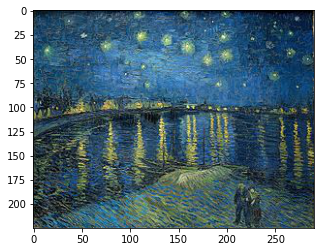

In [9]:
plt.imshow(matriz_colorida)

In [10]:
matriz_cinza = transformacoes.imagem_to_cinza(matriz_colorida)

In [12]:
matriz_cinza

array([[ 23.,  31.,  18., ...,  10.,  15.,  93.],
       [ 33.,  36.,  22., ...,   0.,   2.,  61.],
       [ 36.,  34.,  37., ...,   4.,   8.,  64.],
       ...,
       [126., 110.,  61., ...,  78.,  66.,  62.],
       [ 58.,  79.,  67., ...,  98., 113.,  91.],
       [124., 118., 102., ...,  66.,  94.,  73.]])

In [13]:
matriz_cinza.shape

(225, 290)

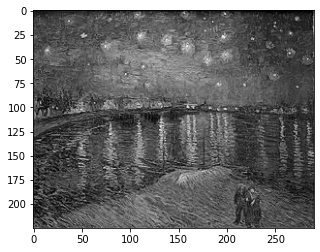

In [16]:
plt.imshow(matriz_cinza, cmap='gray')

In [17]:
matriz_imagem_blur = matriz_cinza.copy()

In [18]:
lins = matriz_cinza.shape[0]
cols = matriz_cinza.shape[1]

### Passando a máscara
```
1 1 1
1 1 1  *  1/9
1 1 1
```

In [19]:
m = matriz_cinza
for i in range(1, lins-1):
    for j in range(1, cols-1):
        matriz_imagem_blur[i][j] = (
                                    1*m[i-1][j-1] + 1*m[i-1][j  ] + 1*m[i-1][j+1] + 
                                    1*m[i  ][j-1] + 1*m[i  ][j  ] + 1*m[i  ][j+1] + 
                                    1*m[i+1][j-1] + 1*m[i+1][j  ] + 1*m[i+1][j+1]
                                    )/9
        
        

In [20]:
matriz_imagem_blur

array([[ 23.        ,  31.        ,  18.        , ...,  10.        ,
         15.        ,  93.        ],
       [ 33.        ,  30.        ,  27.33333333, ...,   8.11111111,
         28.55555556,  61.        ],
       [ 36.        ,  34.11111111,  27.22222222, ...,  10.44444444,
         24.77777778,  64.        ],
       ...,
       [126.        ,  87.22222222,  77.44444444, ...,  74.55555556,
         77.44444444,  62.        ],
       [ 58.        ,  93.88888889,  83.22222222, ...,  80.77777778,
         82.33333333,  91.        ],
       [124.        , 118.        , 102.        , ...,  66.        ,
         94.        ,  73.        ]])

In [21]:
matriz_imagem_blur.astype(int)

array([[ 23,  31,  18, ...,  10,  15,  93],
       [ 33,  30,  27, ...,   8,  28,  61],
       [ 36,  34,  27, ...,  10,  24,  64],
       ...,
       [126,  87,  77, ...,  74,  77,  62],
       [ 58,  93,  83, ...,  80,  82,  91],
       [124, 118, 102, ...,  66,  94,  73]])

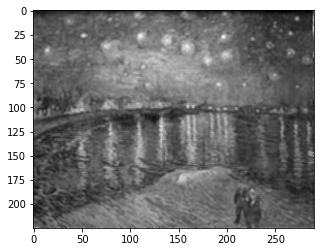

In [22]:
plt.imshow(matriz_imagem_blur, cmap='gray')

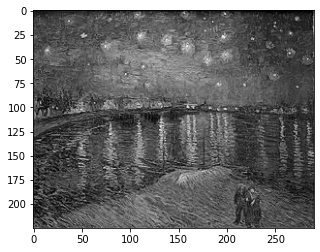

In [23]:
plt.imshow(matriz_cinza, cmap='gray')

### Testando outro filtro (Solbe) em outra imagem

In [24]:
nome_file = os.path.join('..', 'imagens', 'Red_Wine_Glass.jpg')

In [25]:
matriz_colorida = imfi.file_to_matriz(nome_file)

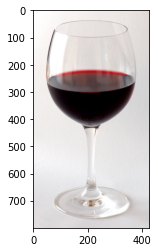

In [26]:
plt.imshow(matriz_colorida)

In [27]:
matriz_cinza = transformacoes.imagem_to_cinza(matriz_colorida)

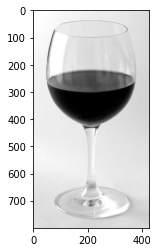

In [29]:
plt.imshow(matriz_cinza, cmap='gray')

In [30]:
matriz_cinza

array([[255., 255., 255., ..., 216., 221., 217.],
       [255., 255., 255., ..., 218., 223., 218.],
       [255., 255., 255., ..., 220., 223., 217.],
       ...,
       [223., 221., 221., ..., 214., 214., 216.],
       [224., 222., 221., ..., 215., 214., 215.],
       [226., 223., 221., ..., 216., 214., 215.]])

In [31]:
lins = matriz_cinza.shape[0]
cols = matriz_cinza.shape[1]

In [32]:
matriz_imagem_sobel_vertical = matriz_cinza.copy()
matriz_imagem_sobel_horizontal = matriz_cinza.copy()

### Passando os filtros e somando o resultado

```
1 0 -1
2 0 -2
1 0 -1
```

```
 1  2  1
 0  0  0
-1 -2 -1
```


In [34]:
m = matriz_cinza
for i in range(1, lins-1):
    for j in range(1, cols-1):
        matriz_imagem_sobel_vertical[i][j] = (
                                    1*m[i-1][j-1] + 0*m[i-1][j  ] + -1*m[i-1][j+1] + 
                                    2*m[i  ][j-1] + 0*m[i  ][j  ] + -2*m[i  ][j+1] + 
                                    1*m[i+1][j-1] + 0*m[i+1][j  ] + -1*m[i+1][j+1]
                                    )
        matriz_imagem_sobel_vertical[i][j] = max(0, matriz_imagem_sobel_vertical[i][j])
        matriz_imagem_sobel_vertical[i][j] = min(255, matriz_imagem_sobel_vertical[i][j])
        
        

In [35]:
matriz_imagem_sobel_vertical

array([[255., 255., 255., ..., 216., 221., 217.],
       [255.,   0.,   0., ...,   0.,   2., 218.],
       [255.,   0.,   0., ...,   4.,  12., 217.],
       ...,
       [223.,   8.,   0., ...,   7.,   0., 216.],
       [224.,  13.,   0., ...,  12.,   0., 215.],
       [226., 223., 221., ..., 216., 214., 215.]])

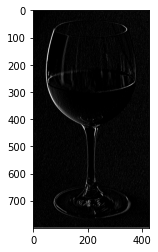

In [36]:
plt.imshow(matriz_imagem_sobel_vertical, cmap='gray')

In [39]:
m = matriz_cinza
for i in range(1, lins-1):
    for j in range(1, cols-1):
        matriz_imagem_sobel_horizontal[i][j] = (
                                    1*m[i-1][j-1] +  2*m[i-1][j  ] +  1*m[i-1][j+1] + 
                                    0*m[i  ][j-1] +  0*m[i  ][j  ] +  0*m[i  ][j+1] + 
                                   -1*m[i+1][j-1] + -2*m[i+1][j  ] + -1*m[i+1][j+1]
                                    )
        matriz_imagem_sobel_horizontal[i][j] = max(0, matriz_imagem_sobel_horizontal[i][j])
        matriz_imagem_sobel_horizontal[i][j] = min(255, matriz_imagem_sobel_horizontal[i][j])
        
        

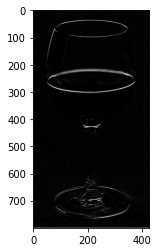

In [40]:
plt.imshow(matriz_imagem_sobel_horizontal, cmap='gray')

In [43]:
matriz_imagem_sobel = matriz_imagem_sobel_horizontal + matriz_imagem_sobel_vertical
for i in range(1, lins-1):
    for j in range(1, cols-1):
        matriz_imagem_sobel[i][j] = max(0, matriz_imagem_sobel[i][j])
        matriz_imagem_sobel[i][j] = min(255, matriz_imagem_sobel[i][j])

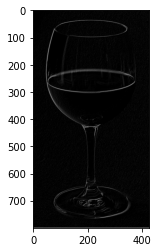

In [44]:
plt.imshow(matriz_imagem_sobel, cmap='gray')